In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Q1. 'class'별 평균 나이는?

In [9]:
df_age = df.groupby('class').agg(mean_age = ('age', 'mean'))
df_age

,mean_age
class,
First,38.233441
Second,29.877630
Third,25.140620


In [48]:
# First클래스는 평균 38세, Second클래스는 평균 30세, Third클래스는 평균 25세인 것을 알 수 있다.

### Q2. 'class'별 인원은?

In [41]:
df_class = df['class'].value_counts()
df_class

Third     491
First     216
Second    184
Name: class, dtype: int64

In [49]:
# Third클래스에 탑승한 인원이 가장 많고, Second클래스가 가장 적은 것을 알 수 있다.

### Q3. 여성 생존율이 남성 생존율보다 높을까?

        mean_survived
sex                  
female       0.742038
male         0.188908
AxesSubplot(0.125,0.125;0.775x0.755)


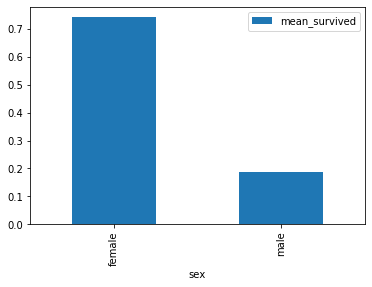

In [56]:
df_survied = df.groupby('sex').agg(mean_survived = ('survived', 'mean'))
print(df_survied)
print(df_survied.plot.bar())

In [58]:
# 여자 생존율이 남자 생존율보다 약 4배 높은 것을 알 수 있다.

### Q4. 생존자수와 사망자수의 비율은?

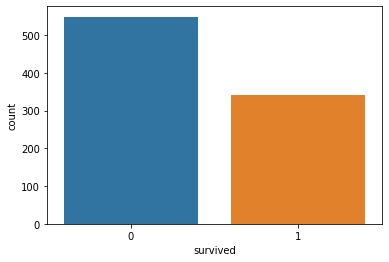

In [60]:
sns.countplot(x = 'survived', data=df);

In [61]:
# 사망자(0)의 비율이 생존자(1) 비율보다 높은 것을 알 수 있다.

### Q5. 'class'별 생존율은?

In [67]:
df_survived = df[['class','survived']].groupby('class').mean()*100 # 100을 곱해 백분율로 나타내기
df_survived

,survived
class,
First,62.962963
Second,47.282609
Third,24.236253


In [66]:
# First클래스의 생존율이 가장 높고, Third클래스의 생존율이 가장 낮은 것을 알 수 있다.
# 등급이 높을수록 생존율이 높다는 것을 알 수 있다.

### Q6. 'embark_town'별 인원 수는?

In [71]:
df.isna().sum()  #'embark_town'에 결측값이 있는 것을 볼 수 있다.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [80]:
# 결측치 있는 행 제거하기
df_embark = df.dropna(subset = ['embark_town'])
df_embark.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [84]:
df_embark.groupby('embark_town').agg( n = ('sex','count')).sort_values('n', ascending=False)

,n
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [87]:
# 'Southampton'항의 승객 수가 가장 많다.

### Q7. 'embarked'에따른 class별 수는?

In [90]:
df_S = df[df['embarked']=='S']['class'].value_counts()
df_C = df[df['embarked']=='C']['class'].value_counts()
df_Q = df[df['embarked']=='Q']['class'].value_counts()

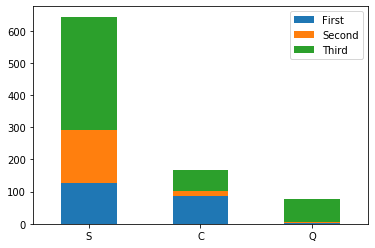

In [101]:
df_embarked= pd.DataFrame([df_S, df_C, df_Q])
df_embarked.index = ['S','C','Q']
df_embarked.plot(kind='bar', stacked=True,rot=0);

In [102]:
# First클래스의 비율이 'embarked'별로 다른 것을 알 수 있다.

### Q8. 나이별로 구분할 수 있게 파생변수 추가하기

In [103]:
# 0~18세: Baby
# 19~25세: Youth
# 26~35세: YoungAdult
# 36~60세: MiddleAged
# 61~100세: Senior

bins = [0, 18, 25, 35, 60, 100]
age_name = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins, labels=age_name)
df['age_group'].value_counts()

YoungAdult    196
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: age_group, dtype: int64

### Q8. age_name의 'Youth'중 생존자 수는?

In [113]:
df_youth = df.query('age_group == "Youth" & survived==1')
df_youth.agg(n = ('survived','count'))

,survived
n,54


In [114]:
# 19~25세 생존자 수는 54명인 것을 알 수 있다.

### Q9. 'class'별 평균 요금과 생존율은?

In [115]:
df_fare = df.groupby('class').agg(mean_fare = ('fare','mean'))
df_fare

,mean_fare
class,
First,84.154687
Second,20.662183
Third,13.675550


In [117]:
# First클래스 요금이 Third 클래스요금 보다 약 5배 높은 것을 알 수 있다.
# (Q5참고) 생존율이 First클래스가 높으므로 비싼 클래스를 탄 탑승자가 우선적으로 구출된 것 을 알 수 있다.

### Q10. 가족과 생존율에 관계가 있을까?

In [122]:
# sibsp(함께 탑승한 형제자매, 아내, 남편의 수 ) + parch(함께 탑승한 부모, 자식의 수  = 가족 수
df['Family'] = df['sibsp']+df['parch']

In [123]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,Family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Youth,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,MiddleAged,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,YoungAdult,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,YoungAdult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,YoungAdult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,YoungAdult,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Youth,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,YoungAdult,0


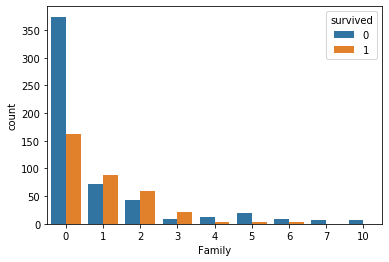

In [127]:
sns.countplot( x = 'Family', hue = 'survived', data=df);

In [ ]:
# 혼자(0)온 여행객의 사망률이 높은 것을 확인 할 수 있다.